In [0]:
import os, os.path, shutil
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
%matplotlib inline

In [34]:
!curl -L https://goo.gl/s8qSL5 -o bike_train.csv

train = pd.read_csv("bike_train.csv", parse_dates=["datetime"])
train.head()

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  643k  100  643k    0     0   543k      0  0:00:01  0:00:01 --:--:-- 10.9M


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.6 KB


In [36]:
train["d-year"] = train["datetime"].dt.year
train["d-month"] = train["datetime"].dt.month
train["d-day"] = train["datetime"].dt.day
train["d-hour"] = train["datetime"].dt.hour
train["d-minute"] = train["datetime"].dt.minute
train["d-second"] = train["datetime"].dt.second

train[["datetime", "d-year", "d-month", "d-day", "d-hour", "d-minute", "d-second"]].head()

,datetime,d-year,d-month,d-day,d-hour,d-minute,d-second
0,2011-01-01 00:00:00,2011,1,1,0,0,0
1,2011-01-01 01:00:00,2011,1,1,1,0,0
2,2011-01-01 02:00:00,2011,1,1,2,0,0
3,2011-01-01 03:00:00,2011,1,1,3,0,0
4,2011-01-01 04:00:00,2011,1,1,4,0,0


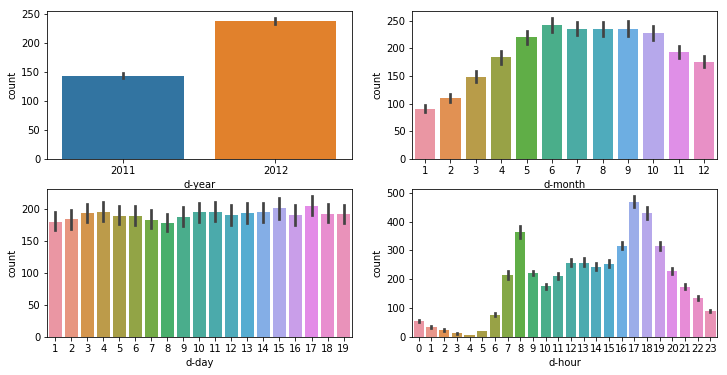

In [37]:
figure, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2,ncols=2)
figure.set_size_inches(12, 6)

sns.barplot(data=train, x="d-year", y="count", ax=ax1)
sns.barplot(data=train, x="d-month", y="count", ax=ax2)
sns.barplot(data=train, x="d-day", y="count", ax=ax3)
sns.barplot(data=train, x="d-hour", y="count", ax=ax4)

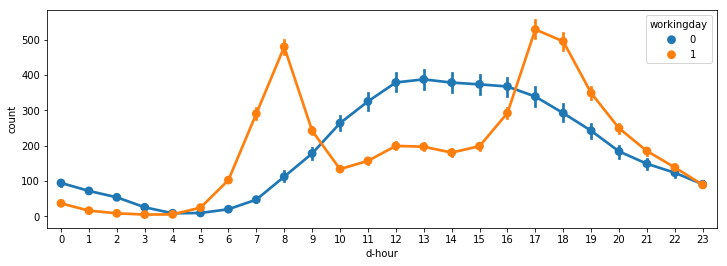

In [38]:
plt.figure(figsize=(12,4))
sns.pointplot(data=train, x="d-hour", y="count", hue="workingday")

In [39]:
train["d-dayofweek"] = train["datetime"].dt.dayofweek

print(train.shape)
train[["datetime", "d-dayofweek"]].head()

(10886, 19)


,datetime,d-dayofweek
0,2011-01-01 00:00:00,5
1,2011-01-01 01:00:00,5
2,2011-01-01 02:00:00,5
3,2011-01-01 03:00:00,5
4,2011-01-01 04:00:00,5


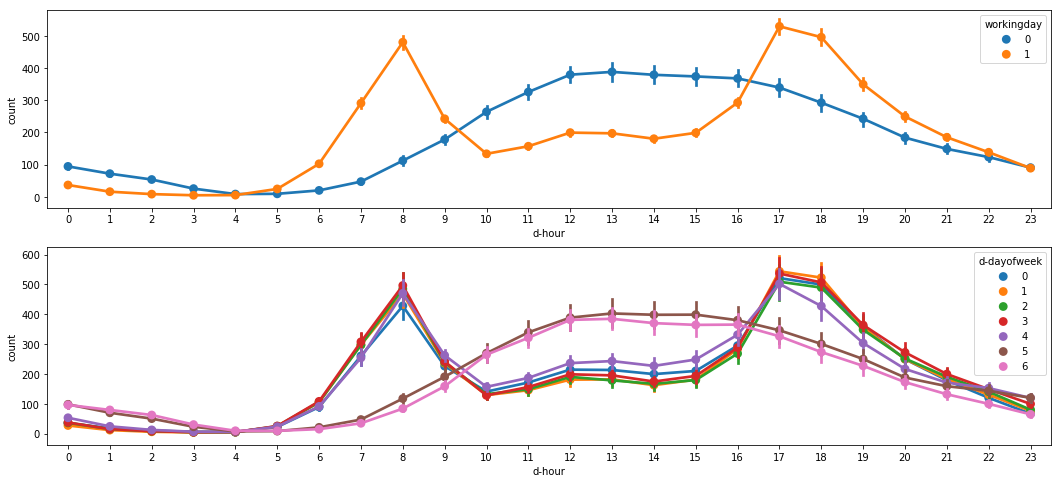

In [40]:
figure, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
figure.set_size_inches(18,8)

sns.pointplot(data=train, x="d-hour", y="count", hue="workingday", ax=ax1)
sns.pointplot(data=train, x="d-hour", y="count", hue="d-dayofweek", ax=ax2)

In [0]:
features = ["season", "holiday", "workingday", "weather", "temp", "atemp", "humidity", "windspeed", "d-year", "d-hour", "d-dayofweek"]
X_train = train[features]

In [0]:
y_train = train["count"]
y_train = np.log(y_train +1)

In [0]:
def rmsle(predict, actual):
  predict = np.array(predict)
  actual = np.array(actual)
  
  log_predict = predict + 1
  log_actual = actual + 1
  
  difference = log_predict - log_actual
  difference = np.square(difference)
  
  mean_difference = difference.mean()
  score = np.sqrt(mean_difference)
  return score

rmsle_scorer = make_scorer(rmsle)

In [46]:
n_estimators = 30

max_depth_list = [10,20,30,50,100]
max_features_list = [0.1,0.3,0.5,0.7,0.9]

hyperparameters_list = []

for max_depth in max_depth_list:
    for max_features in max_features_list:
        model = RandomForestRegressor(n_estimators = n_estimators, 
                                  max_depth=max_depth, 
                                    max_features=max_features, 
                                    random_state=11, n_jobs=-1)
        score = cross_val_score(model, X_train, y_train, cv=10, scoring=rmsle_scorer).mean()
        hyperparameters_list.append({'score':score, 'n_estimators':n_estimators, 'max_depth':max_depth, 'max_features': max_features,})
    
        print("score = {0:.5f}".format(score))

score = 0.73011
score = 0.55578
score = 0.46170
score = 0.43632
score = 0.41803
score = 0.63028
score = 0.48755
score = 0.41494
score = 0.39606
score = 0.38993


/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


score = 0.62986
score = 0.48077
score = 0.41386
score = 0.40118
score = 0.39255
score = 0.62933
score = 0.47971
score = 0.41372
score = 0.40092
score = 0.39296
score = 0.62933
score = 0.47971
score = 0.41372
score = 0.40092
score = 0.39296


In [45]:
hyperparameters_list = pd.DataFrame.from_dict(hyperparameters_list)
hyperparameters_list = hyperparameters_list.sort_values(by="score")

print(hyperparameters_list.shape)
hyperparameters_list.head()

(5, 4)


,max_depth,max_features,n_estimators,score
1,20,0.9,30,0.389932
2,30,0.9,30,0.392554
3,50,0.9,30,0.392963
4,100,0.9,30,0.392963
0,10,0.9,30,0.418032


In [0]:
hyperparameters_list = []

n_estimators = 30
